# 🗺️ District-Level Cooking Cost Map with Correct Mapping

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


❌ Unmatched Districts: []


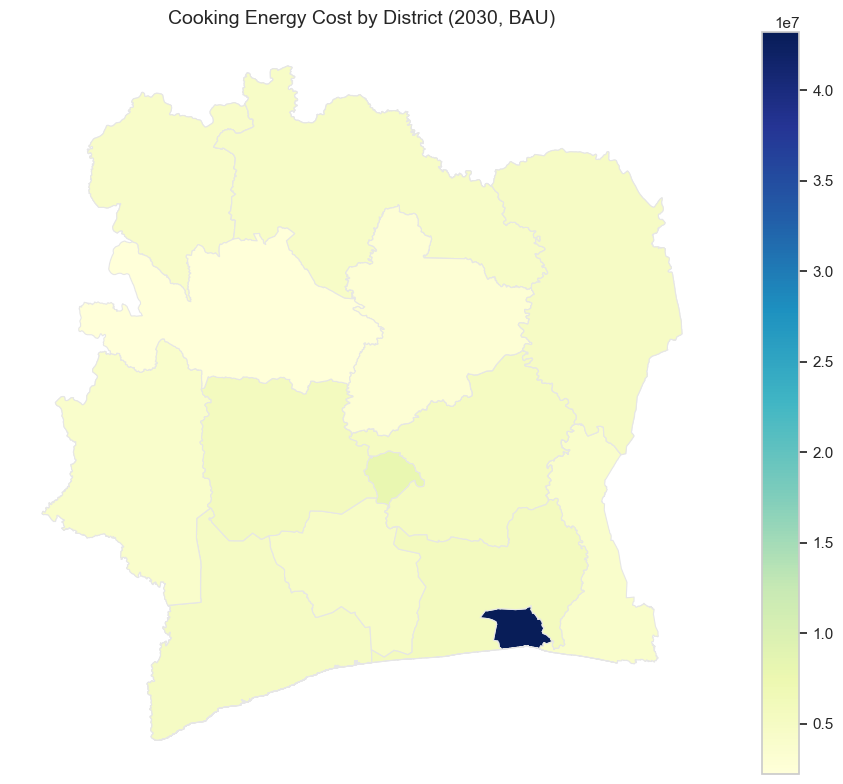

In [7]:
# Load model results and ADM1 shapefile
summary = pd.read_excel("results/ci_bioenergy_techpathways.xlsx", sheet_name="Summary")
adm1 = gpd.read_file("data/gadm41_CIV.gpkg", layer=1)

# Clean whitespace
summary["Region"] = summary["Region"].str.strip()
adm1["NAME_1"] = adm1["NAME_1"].str.strip()

# Filter to 2030 and BAU scenario
df = summary[(summary["Year"] == 2030) & (summary["Scenario"] == "bau")]

# Load and apply Region to District mapping
mapping = pd.read_csv("data/Region_to_District.csv")

df = df.merge(mapping, on="Region", how="left")
df["District"] = df["District"].str.strip()

# Merge with shapefile
merged = adm1.merge(df[["District", "Total_Cost_USD"]], left_on="NAME_1", right_on="District", how="left")

unmatched = merged[merged["Total_Cost_USD"].isna()]
print("❌ Unmatched Districts:", unmatched["NAME_1"].unique())

# Plot map
fig, ax = plt.subplots(figsize=(10, 8))
merged.plot(column="Total_Cost_USD", cmap="YlGnBu", linewidth=0.8, edgecolor="0.9", legend=True, ax=ax)
ax.set_title("Cooking Energy Cost by District (2030, BAU)", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


## Plot National Cost Trajectories

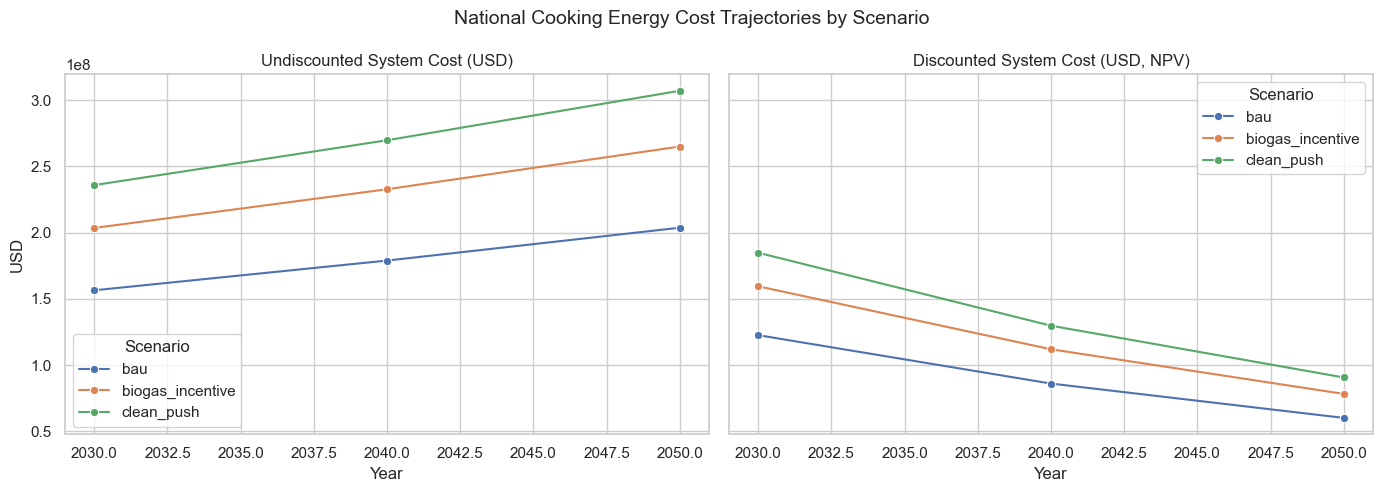

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load summary results
summary = pd.read_excel("results/ci_bioenergy_techpathways.xlsx", sheet_name="Summary")

# Aggregate costs nationally per year + scenario
national = summary.groupby(["Scenario", "Year"])[["Total_Cost_USD", "Discounted_Cost_USD"]].sum().reset_index()

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Undiscounted
sns.lineplot(data=national, x="Year", y="Total_Cost_USD", hue="Scenario", marker="o", ax=ax[0])
ax[0].set_title("Undiscounted System Cost (USD)")
ax[0].set_ylabel("USD")
ax[0].set_xlabel("Year")

# Discounted
sns.lineplot(data=national, x="Year", y="Discounted_Cost_USD", hue="Scenario", marker="o", ax=ax[1])
ax[1].set_title("Discounted System Cost (USD, NPV)")
ax[1].set_ylabel("USD")
ax[1].set_xlabel("Year")

plt.suptitle("National Cooking Energy Cost Trajectories by Scenario", fontsize=14)
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

summary_df = pd.read_excel("results/ci_bioenergy_techpathways.xlsx", sheet_name="Summary")
summary_df[
    (summary_df["Year"] == 2030) &
    (summary_df["Region"].isin(["Nawa", "San-Pédro", "Gbôklé"]))
]

,Scenario,Year,Region,Total_Cost_USD
9,bau,2030,Gbôklé,4387212.93
19,bau,2030,Nawa,4290429.72
22,bau,2030,San-Pédro,5015839.73
87,clean_push,2030,Gbôklé,6614929.21
97,clean_push,2030,Nawa,6469003.44
100,clean_push,2030,San-Pédro,7562757.38
165,biogas_incentive,2030,Gbôklé,5712764.06
175,biogas_incentive,2030,Nawa,5586747.13
178,biogas_incentive,2030,San-Pédro,6531326.68
